# Project: Let's open our second gym, wait but *where*!!!

## 1. Introduction  
The owners of a gym are looking to open their second location. Their current gym is located in the borough Feijenoord, Rotterdam, The Netherlands. 
Business is going well. Their concept is mainly focussed on the youth and through initiatives with local restaurants, bars, and sport clubs the gym is advertised. This is thought to be a major part of the success, and makes the location of the gym crucial. 
The second location is to be opened in Amsterdam, the Netherlands. The owners are not familiar with this area, because of the long lasting rivalry between the two cities they are yet to visit the place! Not wanting to spend more time in Amsterdam then absolutely necessarily, they decide to rely on data to find the boroughs most similar to Feijenoord. 

### 1.1 The business problem 
The concept of the current gym is heavily depended on the location. To ensure success of the second location in Amsterdam, the area should be similar to the current location. However, it is unknown which boroughs in Amsterdam are similar to Feijenoord. Therefore, the goal of the project is to find the answer to the following research question: "Which of the boroughs in Amsterdam are similar to Feijenoord, Rotterdam based on the target group of the gym (youths) and the presence of local enterprises (e.g. restaurants, bars and sport clubs)? 

### 1.2. The Analytical Approach 
To answer the research question the neigborhoods should be grouped. A clustering approach is best suited as the data is unlabeled. The boroughs in the same group as Feijenoord are similar to the current area of the gym. An example of a clustering algorith which can be used is k-means. 

## Data-requirements and available data-sources
First the different boroughs in Amsterdam should be mapped. In order for data to be relevant it must be possible to group the data according to these boroughs. Furthermore, the data should be recently updated.  
For a relevant comparision it is crucial to only include relevant data. This is based on the research question and include:
- Population composition based on age and income 
- Number of local restaurants, bars and sport clubs relative to the total population

This means the data is two-fold. The first part consist out of local population composition data. The second part is purely location data. 

**Population composition**  
In The Netherlands the Central Bureau of Statistics (CBS) is the national statiscal office which provided reliable statiscal information and data. (Much of) the data is open source and can be downloaded in csv format from their data portal. This is includes a dataset [Key figures of buroughs and neighborhoods](https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84799NED/table?ts=1612255554791) which provides key figures such as population compositions per neighborhood and borough overall for all major cities in The Netherlands. Metadata of the dataset  can be found in this [csv file](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=84799NED&_theme=235#). Besides providing descriptions of the different columns in the dataset, the metadata also links the "Codering_3" column  to the names of the boroughs. The picture below shows a snapshot of a part of the dataset and of the metadata: 
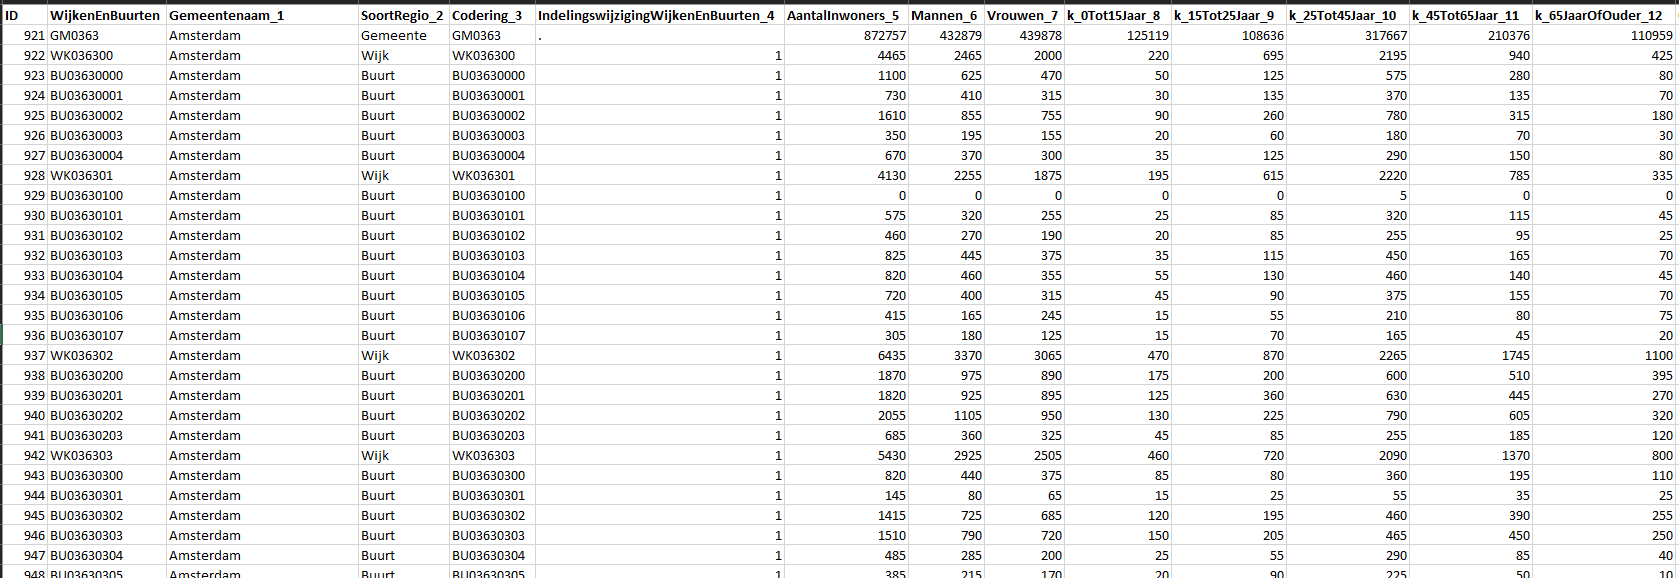
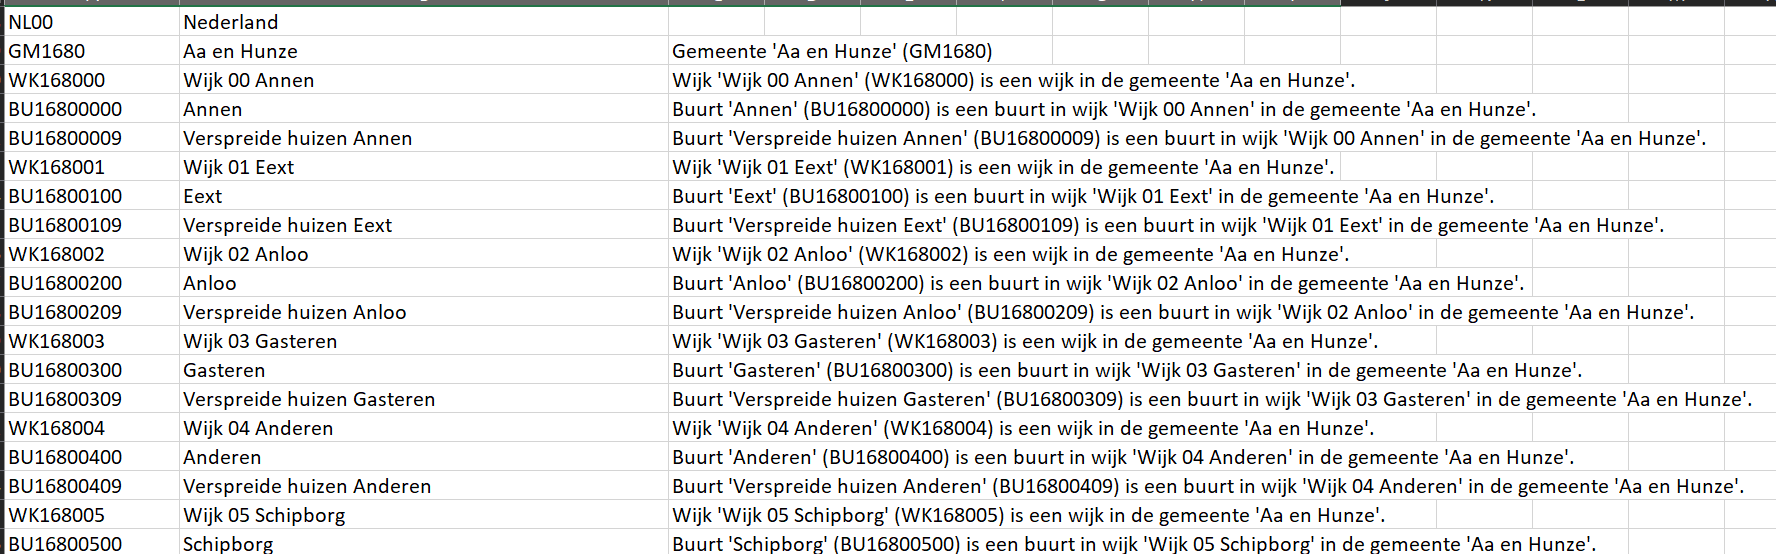

As the dataset includes about 100 columns, the table below only describes the relavant columns based on the research question. Almost all data will be from 2020. The only exception is the average income, the most recent dataset for which this column is complete is 2017.  
In 5 columns the population per age interval is given, together with the column total population this can be used to create a age distribution for the different boroughs. 
GemiddeldInkomenPerInwoner_66 gives the average income per borough. This data in not available yet for 2020. The most recent data is in the data set for 2017 and will  be used instead.

| Column names  |  Descriptions |
|---|---|
|Gemeentenaam_1   |Gives the name of the corresponding city of the neighborhood or borough|
| WijkenEnBuurten  | Gives the code of the neighborhoods and boroughs, the metadata file can be used to retrieve the name using this key |
| AantalInwoners_5  | Gives the total population of the neighborhoods or borough  |
| k_0Tot15Jaar_8 ... k_65JaarOfOuder | Population between intervals of age: 0 - 15 years, 15 to 25 years, 25 to 45 years, 45 to 65 years, 65 or older|
| GemiddeldInkomenPerInwoner_66 | Average income per Person in thousands, not available for 2020, 2017 used instead |


**Location data**   
Information about the type and number of local enterprises, such as restaurants, bars, and sport clubs will be aquired using the location data of Foursquare. In order to retrieve information from Foursquare the coordinates of the boroughs are needed. These coordinates will be retrieved using the package geopy, example given below. The name of the neighborhoods will be retrieved from the "Key figures of buroughs and neighborhoods" metadata file. The number of enterprises per type will be retrieved from Foursquare and normalized to the total population in that area. This can then be used to compare the neighborhoods together with the population compositions.  

In [3]:
import geopy

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Coursera_course")
location = geolocator.geocode("Westerpark, Amsterdam")
print(location.address)
print((location.latitude, location.longitude))

Westerpark, West, Amsterdam, Noord-Holland, Nederland
(52.387236349999995, 4.871777328438663)
